In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv('/Users/wisdomebohoin/Downloads/movies.csv')

In [220]:
# Initial look at the data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actual_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [24]:
# Checking for missing data in each coloumn to get an overview of the dataset's completeness

missing_percentages = df.isnull().mean() * 100
missing_percentages_sorted = missing_percentages.sort_values(ascending=False)

for col, percent_missing in missing_percentages_sorted.items():
    print(f'{col} - {percent_missing:.2f}%')

budget - 28.31%
gross - 2.46%
rating - 1.00%
company - 0.22%
runtime - 0.05%
score - 0.04%
votes - 0.04%
writer - 0.04%
country - 0.04%
released - 0.03%
star - 0.01%
name - 0.00%
genre - 0.00%
year - 0.00%
director - 0.00%


In [28]:
# Filling the missing values for 'budget' and 'gross' with their median
df['budget'] = df['budget'].fillna(df['budget'].median())
df['gross'] = df['gross'].fillna(df['gross'].median())

# Filling the missing values for 'rating' with the mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

missing_percentages = df.isnull().mean() * 100
missing_percentages_sorted = missing_percentages.sort_values(ascending=False)
for col, percent_missing in missing_percentages_sorted.items():
    print(f'{col} - {percent_missing:.2f}%')

company - 0.22%
runtime - 0.05%
score - 0.04%
votes - 0.04%
writer - 0.04%
country - 0.04%
released - 0.03%
star - 0.01%
name - 0.00%
rating - 0.00%
genre - 0.00%
year - 0.00%
director - 0.00%
budget - 0.00%
gross - 0.00%


In [34]:
# Filling the missing values for minimal missing data columns with the mode
columns_to_fill = ['company', 'runtime', 'score', 'votes', 'writer', 'country', 'released', 'star']
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mode()[0])

missing_percentages = df.isnull().mean() * 100
for col, percent_missing in missing_percentages.items():
    print(f'{col} - {percent_missing:.2f}%')

name - 0.00%
rating - 0.00%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.00%
gross - 0.00%
company - 0.00%
runtime - 0.00%


In [48]:
# checking the datatypes of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [52]:
# Changing the datatypes of columns from float to int
columns_to_change = ['votes', 'budget', 'gross']
for col in columns_to_change:
    df[col] = df[col].astype('int')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [70]:
# Creating a correct year column
df['actual_year'] = df['released'].astype(str).str.extract(r'(\d{4})', expand=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actual_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [74]:
# Checking if year equals correct year
columns_match = df['year'].equals(df['actual_year'])
print(f'Columns match: {columns_match}')

Columns match: False


In [238]:
pd.set_option('display.max_rows', 1000)

In [120]:
# sorting by gross/revenue
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [240]:
# dropping the duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2385, dtype: object

In [112]:
pd.reset_option('display.max_rows')

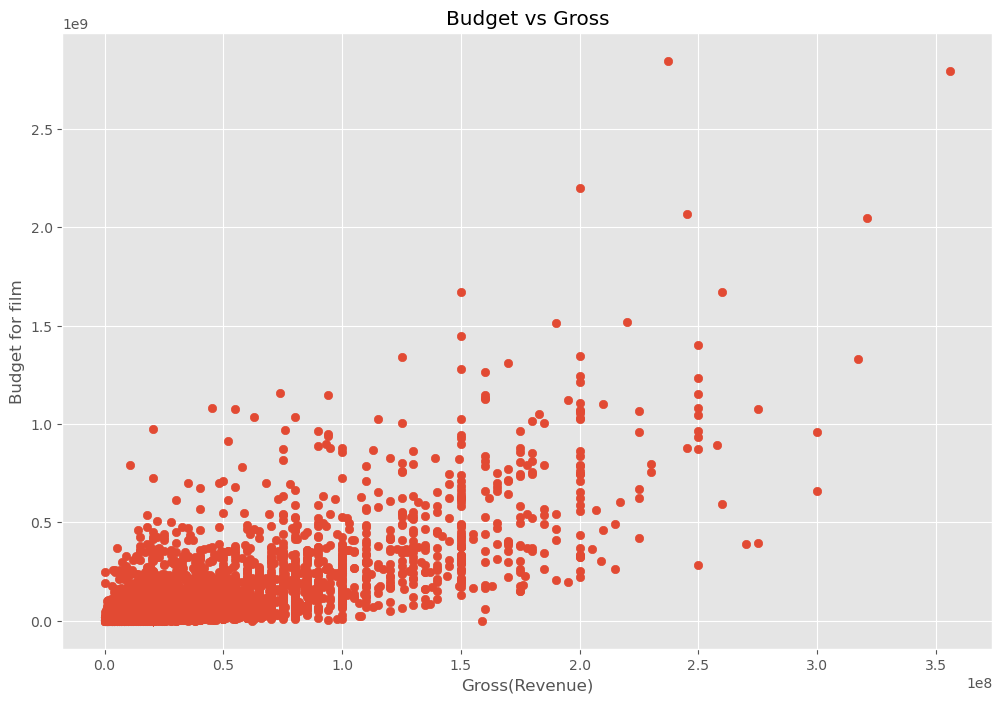

In [128]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross')

plt.xlabel('Gross(Revenue)')

plt.ylabel('Budget for film')

plt.show()


In [158]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actual_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

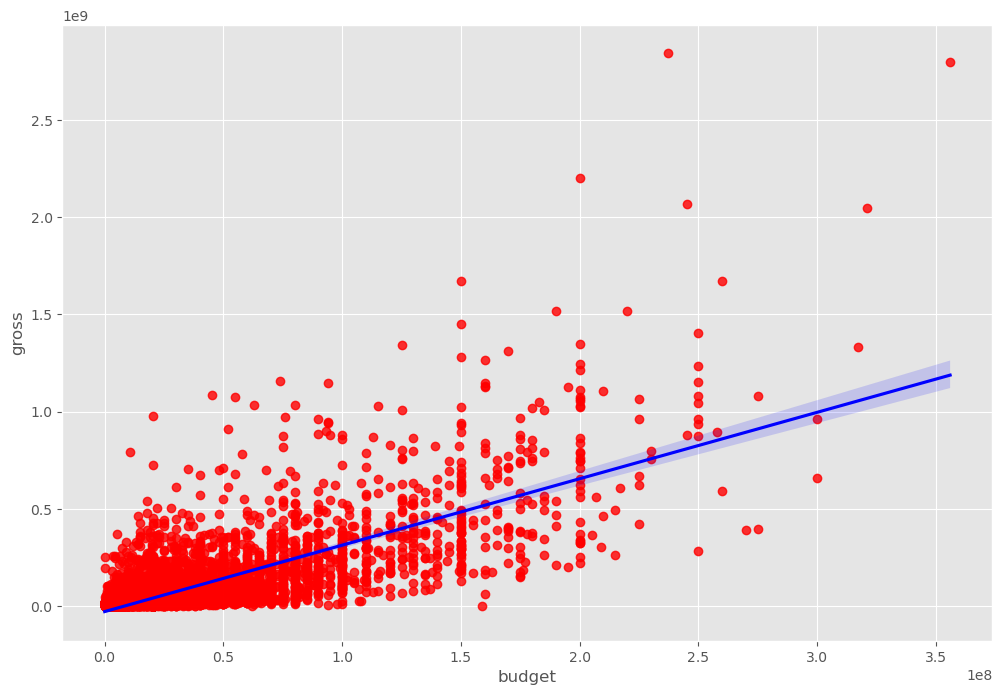

In [160]:
# Plotting the budget vs the gross using seaborn
sns.regplot(x='budget', y ='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [161]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

df_numeric = df[numeric_columns]

correlation_matrix = df_numeric.corr()

print (correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.098084  0.222485  0.291690  0.259504  0.120431
score    0.098084  1.000000  0.409123  0.061896  0.185548  0.399543
votes    0.222485  0.409123  1.000000  0.461001  0.632124  0.309150
budget   0.291690  0.061896  0.461001  1.000000  0.745881  0.273412
gross    0.259504  0.185548  0.632124  0.745881  1.000000  0.244426
runtime  0.120431  0.399543  0.309150  0.273412  0.244426  1.000000


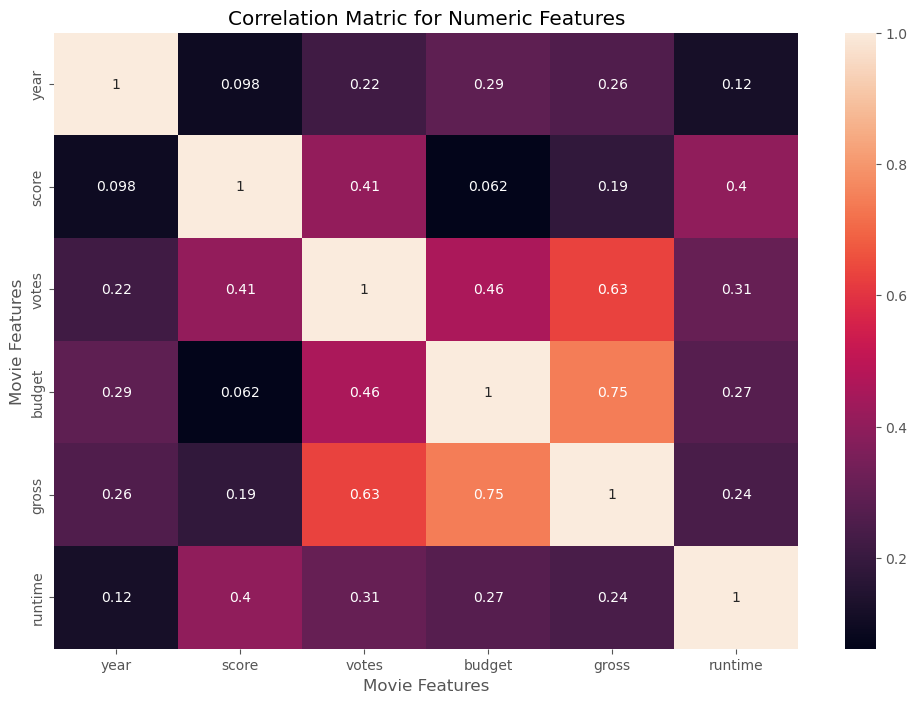

In [162]:
# Theres a high correlation between the budget and gross

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [168]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actual_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [182]:
df_numerised = df.copy()

for col_name in df_numerised.columns:
    if df_numerised[col_name].dtype == 'object':
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes

# Now df_numerised should have numeric codes instead of strings in object columns
df_numerised.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actual_year
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,38


In [186]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actual_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


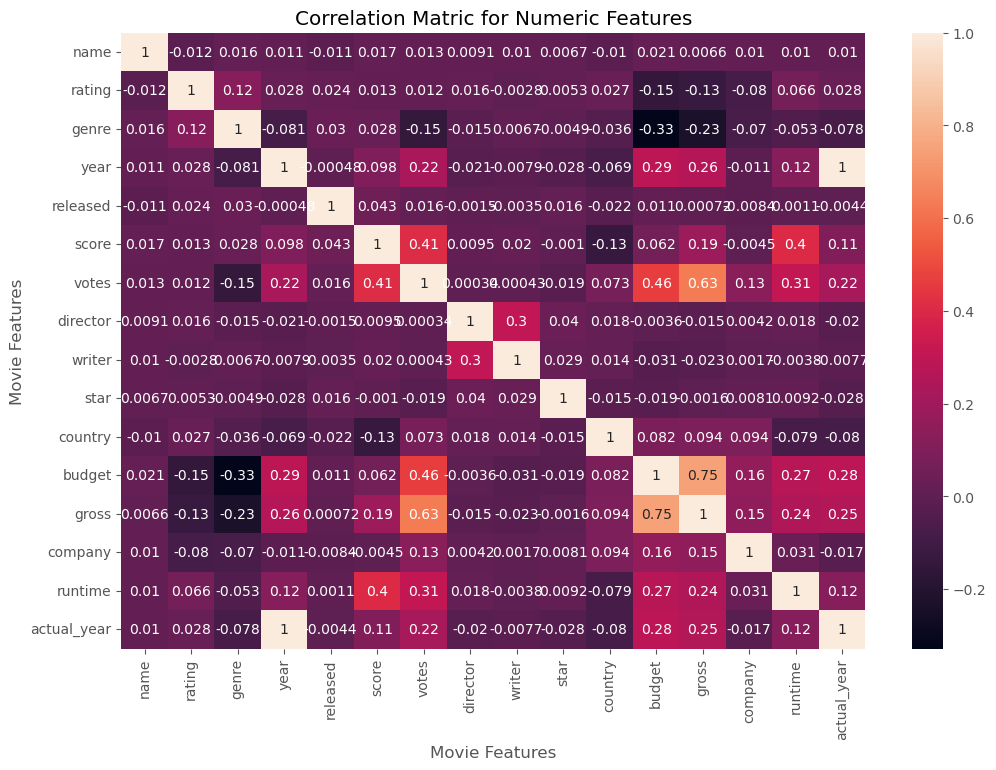

In [190]:
# Theres a high correlation between the budget and gross
correlation_matrix = df_numerised.corr()

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [194]:
df_numerised.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,actual_year
name,1.000000,-0.012441,0.016355,0.011453,-0.011087,0.017114,0.013045,0.009079,0.010018,0.006749,-0.010425,0.020921,0.006601,0.010369,0.010214,0.010379
rating,-0.012441,1.000000,0.123465,0.027931,0.023643,0.013304,0.012253,0.016255,-0.002795,0.005314,0.026930,-0.148543,-0.130478,-0.079626,0.066499,0.028017
genre,0.016355,0.123465,1.000000,-0.081261,0.029997,0.027970,-0.145294,-0.015258,0.006746,-0.004856,-0.035896,-0.328484,-0.233385,-0.070013,-0.052759,-0.078120
year,0.011453,0.027931,-0.081261,1.000000,-0.000484,0.098084,0.222485,-0.020795,-0.007901,-0.027745,-0.069423,0.291690,0.259504,-0.011438,0.120431,0.996802
released,-0.011087,0.023643,0.029997,-0.000484,1.000000,0.042703,0.015930,-0.001492,-0.003461,0.015550,-0.022042,0.011049,0.000721,-0.008443,0.001117,-0.004379
score,0.017114,0.013304,0.027970,0.098084,0.042703,1.000000,0.409123,0.009522,0.019700,-0.001031,-0.134538,0.061896,0.185548,-0.004547,0.399543,0.106290
votes,0.013045,0.012253,-0.145294,0.222485,0.015930,0.409123,1.000000,0.000336,0.000432,-0.019341,0.073500,0.461001,0.632124,0.130533,0.309150,0.217907
director,0.009079,0.016255,-0.015258,-0.020795,-0.001492,0.009522,0.000336,1.000000,0.299512,0.039715,0.017926,-0.003584,-0.014758,0.004250,0.017583,-0.020399
writer,0.010018,-0.002795,0.006746,-0.007901,-0.003461,0.019700,0.000432,0.299512,1.000000,0.028745,0.014409,-0.031050,-0.023028,0.001665,-0.003751,-0.007694
star,0.006749,0.005314,-0.004856,-0.027745,0.015550,-0.001031,-0.019341,0.039715,0.028745,1.000000,-0.014749,-0.018814,-0.001640,0.008072,0.009208,-0.028117


In [218]:
pd.reset_option('display.max_rows')

In [212]:
# view which ones have the highest correlation quickly

correlation_mat = df_numerised.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

votes        gross          0.632124
gross        votes          0.632124
             budget         0.745881
budget       gross          0.745881
year         actual_year    0.996802
actual_year  year           0.996802
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
actual_year  actual_year    1.000000
dtype: float64

In [214]:
# votes and budget have the highest correlation to gross earnings

# company has low correlation